<a href="https://colab.research.google.com/github/gogowonji/Big-Data-Analysis/blob/main/20230425_project5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

red_dataFrame = pd.read_csv('winequality-red.csv', sep=';', header=0, engine='python')
red_dataFrame.to_csv('winequality-red2.csv',index=False)

white_dataFrame = pd.read_csv('winequality-white.csv',sep=';', header=0, engine='python')
white_dataFrame.to_csv('winequality-white2.csv',index=False)

In [ ]:
print(red_dataFrame.head())
print(red_dataFrame.shape)
red_dataFrame.insert(0,column='type',value='red')
print(red_dataFrame.head())
print(red_dataFrame.shape)

print(white_dataFrame.head())
print(white_dataFrame.shape)
white_dataFrame.insert(0,column='type',value='white')
print(white_dataFrame.head())
print(white_dataFrame.shape)

#데이터병합
wine = pd.concat([red_dataFrame,white_dataFrame])
wine.to_csv('wine.csv',index=False)
print(wine.shape)

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5 

In [ ]:
print(wine.info()) #전반적인 정보
wine.columns = wine.columns.str.replace(' ','_')

#기술 통계값
print(wine.describe())
desResult=wine.describe()
desResult.to_csv('descriptive.csv')

print("와인 품질 등급 값")
print(sorted(wine.quality.unique())) #속성값 중 유일한 값
print("와인 품질 등급 값에 대한 빈도 수")
wine.quality.value_counts() #속성값의 빈도 수

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6497 entries, 0 to 4897
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed_acidity         6497 non-null   float64
 2   volatile_acidity      6497 non-null   float64
 3   citric_acid           6497 non-null   float64
 4   residual_sugar        6497 non-null   float64
 5   chlorides             6497 non-null   float64
 6   free_sulfur_dioxide   6497 non-null   float64
 7   total_sulfur_dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6497 non-null   float64
 10  sulphates             6497 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 710.6+ KB
None
       fixed_acidity  volatile_acidity  citric_acid  resid

6    2836
5    2138
7    1079
4     216
8     193
3      30
9       5
Name: quality, dtype: int64

In [ ]:
print("<<타입별 퀄리티 통계>>")
print(wine.groupby('type')['quality'].describe())
print('-----------------------------------------------------------------')
print("<<타입별 속성의 mean, var 통계>>")
print(wine.groupby('type').agg(['mean','var']))
print('-----------------------------------------------------------------')
print("<<타입별 퀄리티의 mean, 알코올의 max 통계>>")
print(wine.groupby('type').agg({'quality':'mean','alcohol':'max'}))
print('-----------------------------------------------------------------')
print("<<타입별 퀄리티의 mean, 알코올의 mean 통계>>")
print(wine.groupby('type').agg({'quality':'mean','alcohol':'mean'}))
print('-----------------------------------------------------------------')
print("<<타입별 알코올 통계>>")
print(wine.groupby('type')['alcohol'].describe())

<<타입별 퀄리티 통계>>
        count      mean       std  min  25%  50%  75%  max
type                                                      
red    1599.0  5.636023  0.807569  3.0  5.0  6.0  6.0  8.0
white  4898.0  5.877909  0.885639  3.0  5.0  6.0  6.0  9.0
-----------------------------------------------------------------
<<타입별 속성의 mean, var 통계>>
      fixed_acidity           volatile_acidity           citric_acid  \
               mean       var             mean       var        mean   
type                                                                   
red        8.319637  3.031416         0.527821  0.032062    0.270976   
white      6.854788  0.712114         0.278241  0.010160    0.334192   

                residual_sugar            chlorides            ...   density  \
            var           mean        var      mean       var  ...      mean   
type                                                           ...             
red    0.037947       2.538806   1.987897  0.087467  0.00

In [ ]:
pip install statsmodels

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from statsmodels.formula.api import ols,glm

Rformula = 'quality~fixed_acidity+volatile_acidity+citric_acid+residual_sugar+chlorides+free_sulfur_dioxide+total_sulfur_dioxide+density+pH+sulphates+alcohol'
# 각각의 독립 변수끼리도 영향을 주고 받으면 안됨

regression_result = ols(Rformula,data=wine).fit()
regression_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.292
Model:                            OLS   Adj. R-squared:                  0.291
Method:                 Least Squares   F-statistic:                     243.3
Date:                Tue, 25 Apr 2023   Prob (F-statistic):               0.00
Time:                        04:42:54   Log-Likelihood:                -7215.5
No. Observations:                6497   AIC:                         1.445e+04
Df Residuals:                    6485   BIC:                         1.454e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               55.7627     11.894      4.688      0.000      32.447      79.079
fixed_acidity            0.0677      0.016      4.346      0.000       0.037       0.098
volatile_acidity        -1.3279      0.077    -17.162      0.000      -1.480      -1.176
citric_acid             -0.1097      0.080     -1.377      0.168      -0.266       0.046
residual_sugar           0.0436      0.005      8.449      0.000       0.033       0.054
chlorides               -0.4837      0.333     -1.454      0.146      -1.136       0.168
free_sulfur_dioxide      0.0060      0.001      7.948      0.000       0.004       0.007
total_sulfur_dioxide    -0.0025      0.000     -8.969      0.000      -0.003      -0.002
density                -54.9669     12.137     -4.529      0.000     -78.760     -31.173
pH                       0.4393      0.090      4.861      0.000       0.262       0.616
sulphates                0.7683      0.076     10.092      0.000       0.619       0.917
alcohol                  0.2670      0.017     15.963      0.000       0.234       0.300
==============================================================================
Omnibus:                      144.075   Durbin-Watson:                   1.646
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              324.712
Skew:                          -0.006   Prob(JB):                     3.09e-71
Kurtosis:                       4.095   Cond. No.                     2.49e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.49e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
sample1 = wine[wine.columns.difference(['quality','type'])] #두 속성 제외시킴
sample1 = sample1[0:5][:] #5줄을 가져옴
print(sample1)
sample1_predict = regression_result.predict(sample1)
print(sample1_predict)
print(wine[0:5]['quality'])

   alcohol  chlorides  citric_acid  density  fixed_acidity  \
0      9.4      0.076         0.00   0.9978            7.4   
1      9.8      0.098         0.00   0.9968            7.8   
2      9.8      0.092         0.04   0.9970            7.8   
3      9.8      0.075         0.56   0.9980           11.2   
4      9.4      0.076         0.00   0.9978            7.4   

   free_sulfur_dioxide    pH  residual_sugar  sulphates  total_sulfur_dioxide  \
0                 11.0  3.51             1.9       0.56                  34.0   
1                 25.0  3.20             2.6       0.68                  67.0   
2                 15.0  3.26             2.3       0.65                  54.0   
3                 17.0  3.16             1.9       0.58                  60.0   
4                 11.0  3.51             1.9       0.56                  34.0   

   volatile_acidity  
0              0.70  
1              0.88  
2              0.76  
3              0.28  
4              0.70  
0    4.9

In [ ]:
data = {"fixed_acidity":[8.5,8.1],
        "volatile_acidity":[0.8,0.5],
        "citric_acid":[0.3,0.4],
        "residual_sugar":[6.1,5.8],
        "chlorides":[0.055,0.04],
        "free_sulfur_dioxide":[30.0,30.1],
        "total_sulfur_dioxide":[98.0,99],
        "density":[0.996,0.91],
        "pH":[3.25,3.01],
        "sulphates":[0.4,0.35],
        "alcohol":[9.0,0.88]}
sample2 = pd.DataFrame(data,columns=sample1.columns)
sample2_predict = regression_result.predict(sample2)
print(sample2_predict)

0    4.809094
1    7.576756
dtype: float64


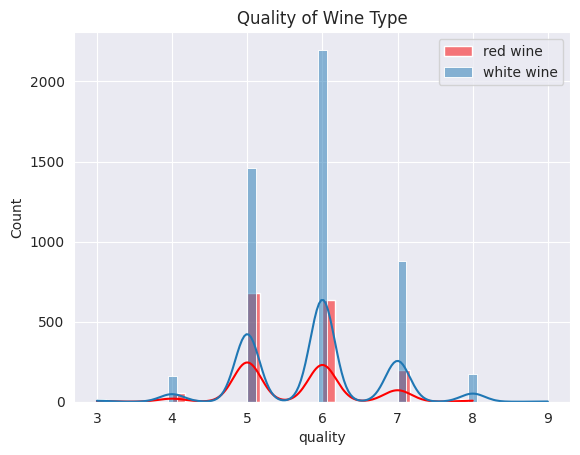

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('darkgrid')
sns.histplot(red_dataFrame['quality'], kde=True, color='red',label='red wine')
sns.histplot(white_dataFrame['quality'], kde=True, label='white wine')
plt.title("Quality of Wine Type")
plt.legend()
plt.show()

eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1


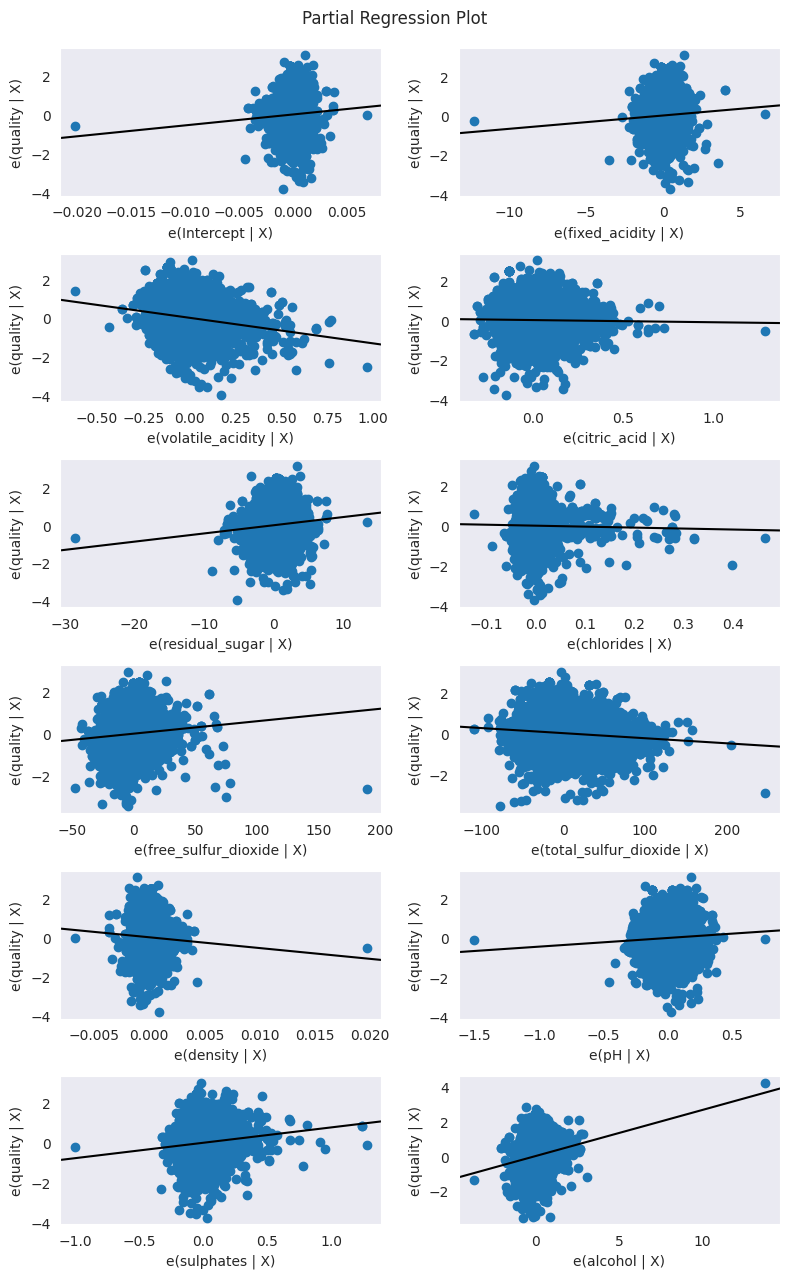

In [ ]:
import statsmodels.api as sm
fig = plt.figure(figsize=(8,13))
sm.graphics.plot_partregress_grid(regression_result,fig=fig)
plt.show()